In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
import keras

In [7]:
df = pd.read_csv(r"C:\Users\sonia\Downloads\archive (10)\Consumption of alcoholic beverages in Russia 2017-2023.csv")

In [9]:
df.head()

,Region,Year,Wine,Beer,Vodka,Sparkling wine,Brandy,Сider,Liqueurs,Total alcohol consumption (in liters of pure alcohol per capita)
0,Belgorod Oblast,2017,1.79,60.00,3.52,0.78,0.31,1.52,0.14,5.6
1,Bryansk Oblast,2017,3.02,34.21,4.29,0.83,0.46,0.86,0.69,4.8
2,Vladimir Oblast,2017,3.70,58.93,6.73,0.91,0.78,1.60,0.54,7.5
3,Voronezh Oblast,2017,2.68,33.17,3.69,1.04,0.60,0.91,0.32,4.4
4,Ivanovo Oblast,2017,3.42,41.01,5.69,0.83,0.60,1.36,0.61,5.9


In [11]:
df.describe()

,Year,Wine,Beer,Vodka,Sparkling wine,Brandy,Сider,Liqueurs,Total alcohol consumption (in liters of pure alcohol per capita)
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000
mean,2020.000000,3.347193,46.464454,5.555613,1.149160,0.788134,0.521311,0.620824,6.348067
std,2.001683,1.640570,17.246429,2.659072,0.629742,0.409611,0.361345,0.417862,2.451978
min,2017.000000,0.010000,0.000000,0.050000,0.000000,0.010000,0.000000,0.000000,0.000000
25%,2018.000000,2.350000,38.295000,3.920000,0.770000,0.525000,0.270000,0.340000,5.200000
50%,2020.000000,3.220000,47.600000,5.310000,1.040000,0.720000,0.460000,0.570000,6.300000
75%,2022.000000,4.360000,56.020000,7.050000,1.460000,1.020000,0.700000,0.810000,7.900000
max,2023.000000,8.470000,116.630000,12.830000,3.360000,2.080000,2.520000,2.950000,12.400000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 10 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Region                                                            595 non-null    object 
 1   Year                                                              595 non-null    int64  
 2   Wine                                                              595 non-null    float64
 3   Beer                                                              595 non-null    float64
 4   Vodka                                                             595 non-null    float64
 5   Sparkling wine                                                    595 non-null    float64
 6   Brandy                                                            595 non-null    float64
 7   Сider                              

In [15]:
df.columns

Index(['Region', 'Year', 'Wine', 'Beer', 'Vodka', 'Sparkling wine', 'Brandy',
       'Сider', 'Liqueurs',
       'Total alcohol consumption (in liters of pure alcohol per capita)'],
      dtype='object')

In [17]:
df.shape

(595, 10)

# Checking for missing values

In [22]:
df.isnull().sum()

Region                                                              0
Year                                                                0
Wine                                                                0
Beer                                                                0
Vodka                                                               0
Sparkling wine                                                      0
Brandy                                                              0
Сider                                                               0
Liqueurs                                                            0
Total alcohol consumption (in liters of pure alcohol per capita)    0
dtype: int64

In [24]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Region,595,85,Belgorod Oblast,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,595.0,NaN,NaN,NaN,2020.0,2.001683,2017.0,2018.0,2020.0,2022.0,2023.0
Wine,595.0,NaN,NaN,NaN,3.347193,1.64057,0.01,2.35,3.22,4.36,8.47
Beer,595.0,NaN,NaN,NaN,46.464454,17.246429,0.0,38.295,47.6,56.02,116.63
Vodka,595.0,NaN,NaN,NaN,5.555613,2.659072,0.05,3.92,5.31,7.05,12.83
Sparkling wine,595.0,NaN,NaN,NaN,1.14916,0.629742,0.0,0.77,1.04,1.46,3.36
Brandy,595.0,NaN,NaN,NaN,0.788134,0.409611,0.01,0.525,0.72,1.02,2.08
Сider,595.0,NaN,NaN,NaN,0.521311,0.361345,0.0,0.27,0.46,0.7,2.52
Liqueurs,595.0,NaN,NaN,NaN,0.620824,0.417862,0.0,0.34,0.57,0.81,2.95
Total alcohol consumption (in liters of pure alcohol per capita),595.0,NaN,NaN,NaN,6.348067,2.451978,0.0,5.2,6.3,7.9,12.4


In [26]:
df.dtypes

Region                                                               object
Year                                                                  int64
Wine                                                                float64
Beer                                                                float64
Vodka                                                               float64
Sparkling wine                                                      float64
Brandy                                                              float64
Сider                                                               float64
Liqueurs                                                            float64
Total alcohol consumption (in liters of pure alcohol per capita)    float64
dtype: object

In [32]:
df['Region'].value_counts()

Region
Belgorod Oblast                          7
Penza Oblast                             7
Chelyabinsk Oblast                       7
Yamalo-Nenets Autonomous Okrug           7
Khanty–Mansi Autonomous Okrug – Yugra    7
                                        ..
Saint Petersburg                         7
Pskov Oblast                             7
Novgorod Oblast                          7
Murmansk Oblast                          7
Chukotka Autonomous Okrug                7
Name: count, Length: 85, dtype: int64

# Year vs Total alcohol consumption (in liters of pure alcohol per capita)

In [37]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


<Axes: xlabel='Year', ylabel='Total alcohol consumption (in liters of pure alcohol per capita)'>

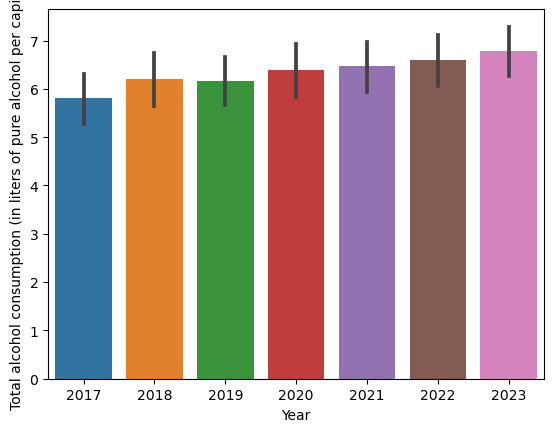

In [41]:
sns.barplot(x=df['Year'],y=df['Total alcohol consumption (in liters of pure alcohol per capita)'], data=df)

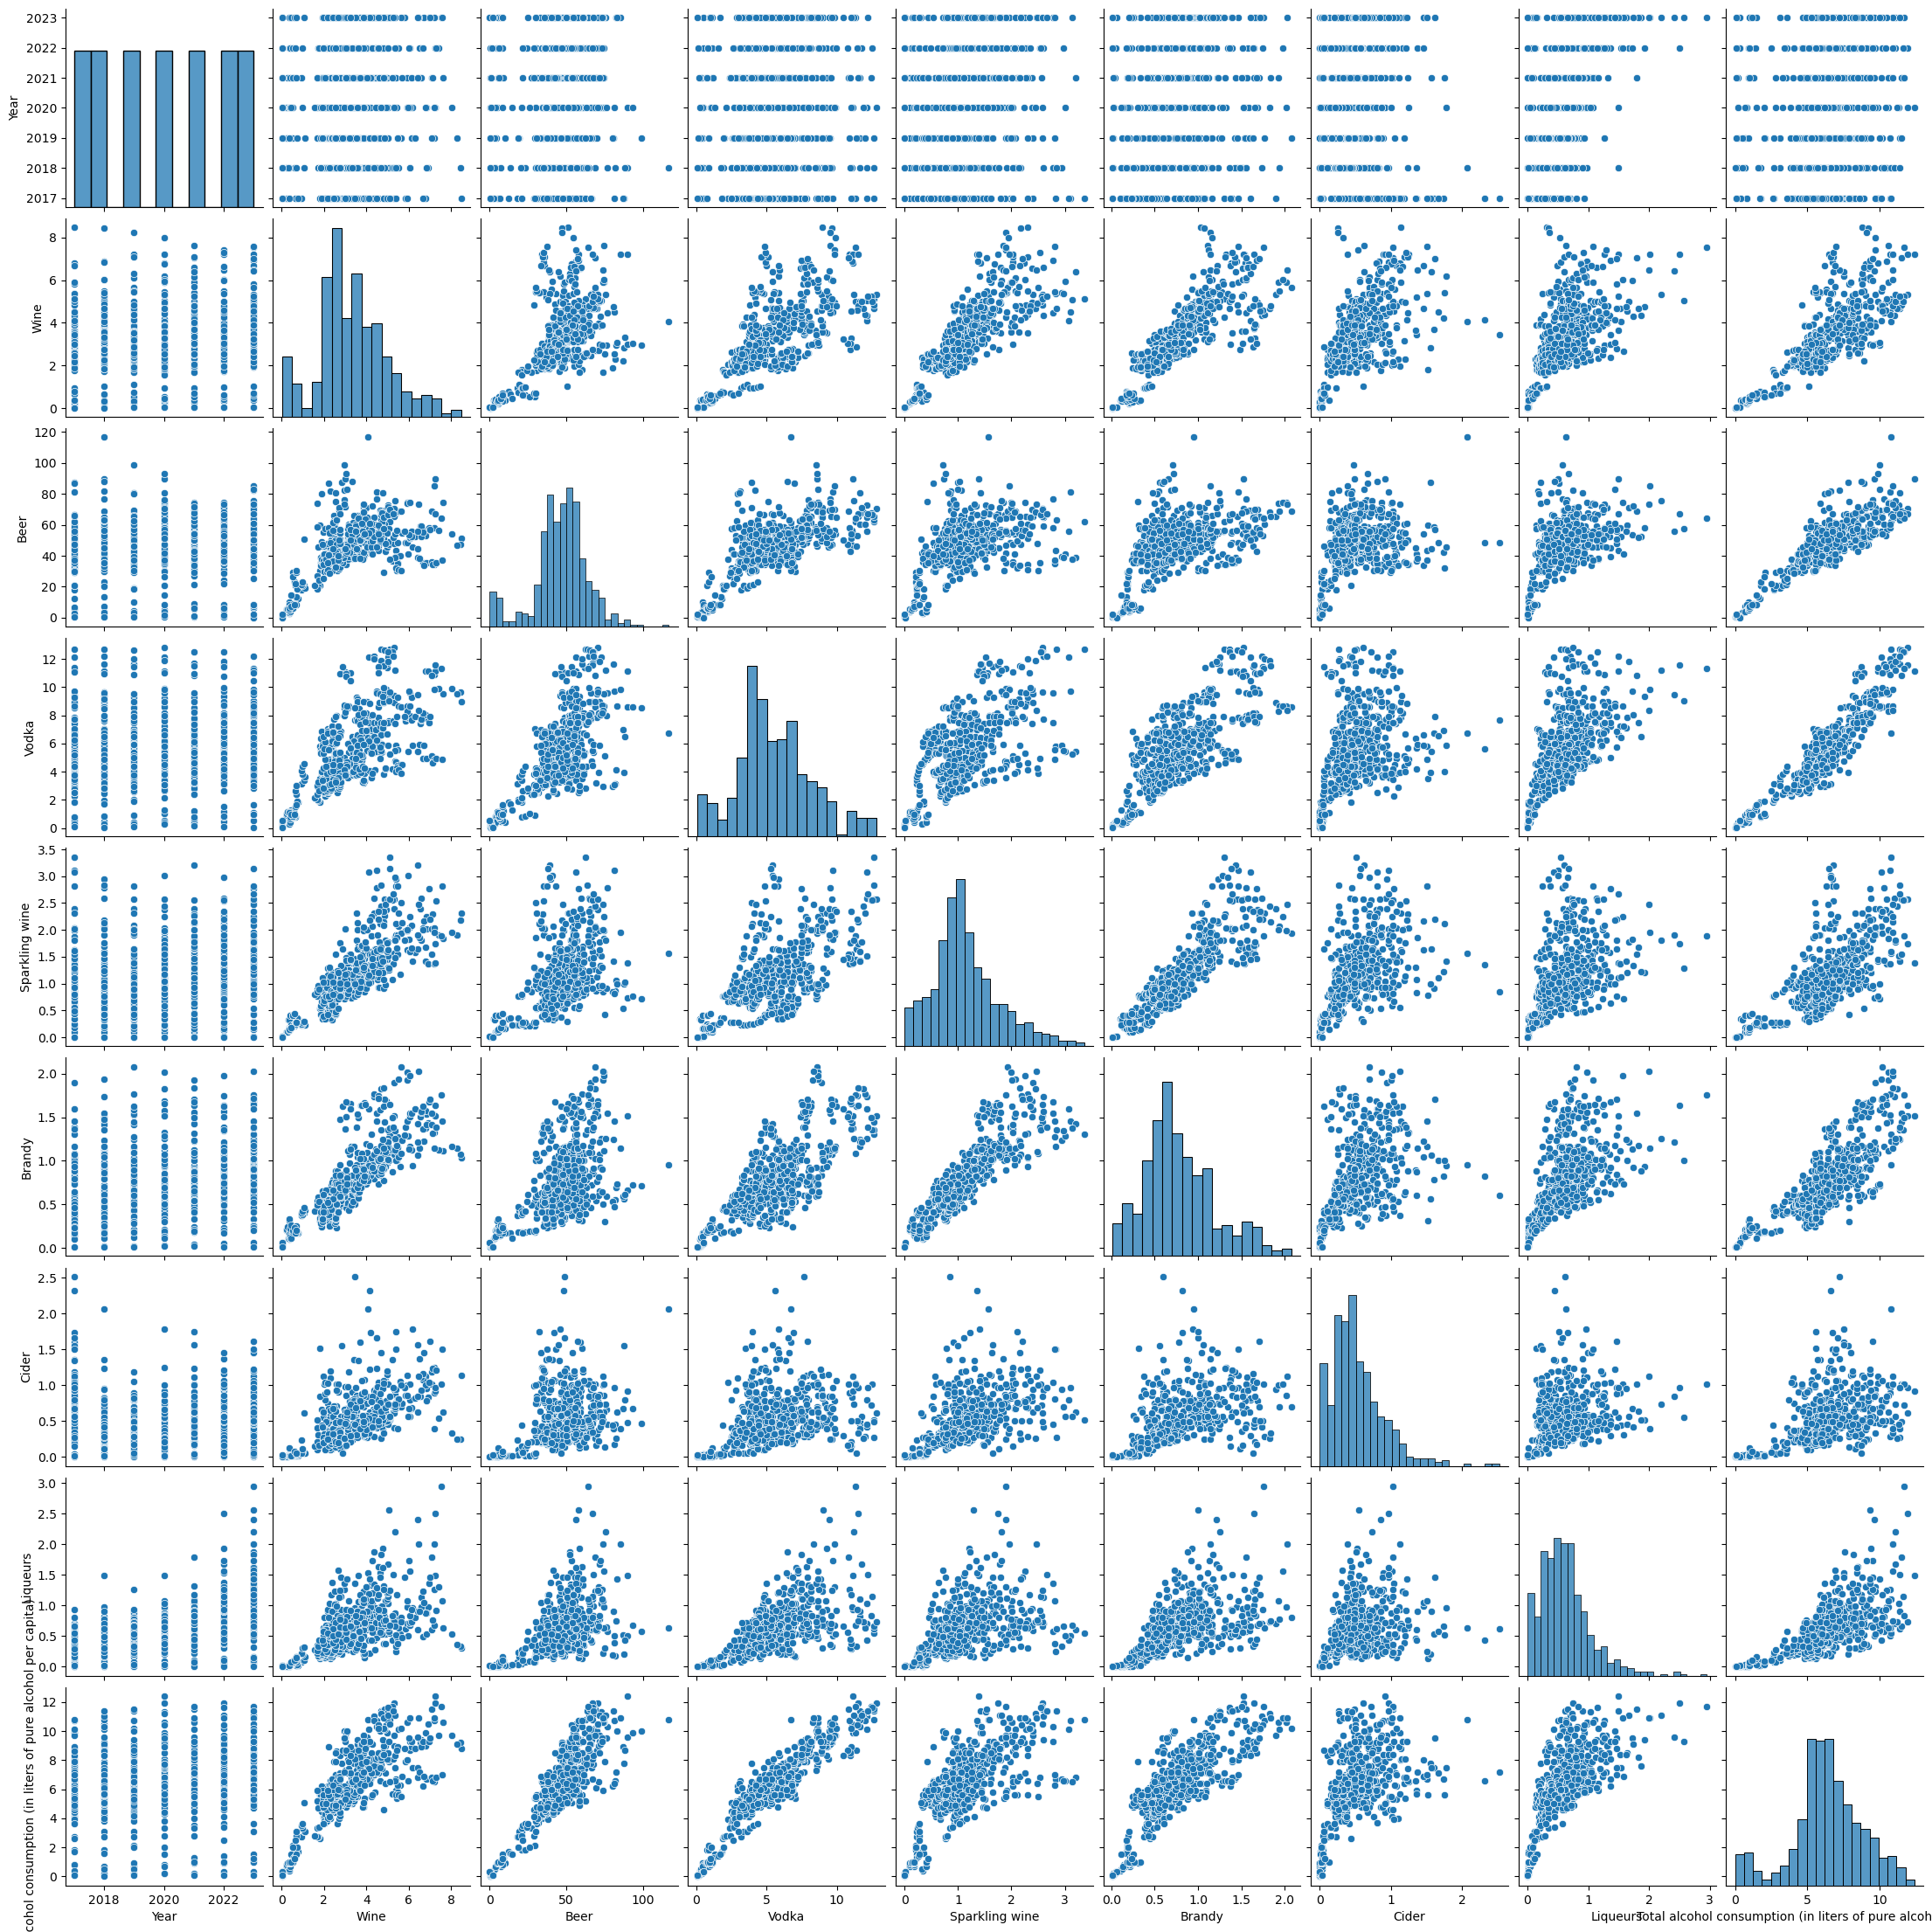

In [43]:
sns.pairplot(df)

In [51]:
X= df.drop(columns=['Total alcohol consumption (in liters of pure alcohol per capita)', 'Region'])
y= df["Total alcohol consumption (in liters of pure alcohol per capita)"]

In [53]:
X

,Year,Wine,Beer,Vodka,Sparkling wine,Brandy,Сider,Liqueurs
0,2017,1.79,60.00,3.52,0.78,0.31,1.52,0.14
1,2017,3.02,34.21,4.29,0.83,0.46,0.86,0.69
2,2017,3.70,58.93,6.73,0.91,0.78,1.60,0.54
3,2017,2.68,33.17,3.69,1.04,0.60,0.91,0.32
4,2017,3.42,41.01,5.69,0.83,0.60,1.36,0.61
...,...,...,...,...,...,...,...,...
590,2023,3.88,73.46,8.17,1.30,0.90,0.49,1.11
591,2023,4.54,54.22,11.02,2.34,1.72,0.50,1.17
592,2023,5.25,67.39,12.21,2.67,1.39,0.97,1.50
593,2023,3.08,82.91,8.68,1.00,0.73,0.62,1.43


In [57]:
# Splitting the dataset into the training set and test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [59]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [66]:
X_train.shape

(476, 8)

# Part-2 Building the ANN Model

In [62]:
from keras.models import Sequential
from keras.layers import Dense

In [68]:
def ann_model_regressor():
        model=Sequential()
        model.add(Dense(input_dim=8, units=17,activation='relu',kernel_initializer="uniform"))
        model.add(Dense(units=1,activation='relu',kernel_initializer="uniform"))
        model.compile(optimizer='adam',loss='mean_squared_error')

        return model

In [70]:
ann=ann_model_regressor()

In [72]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 45.7900   
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.0360 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45.1665 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.0937 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.2823 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40.2490 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39.5023 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.4667 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.0343 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.7338 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.0986 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.8039 
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.6176 
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.4303
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s

In [74]:
## Predict the results
ypred_train= ann.predict(X_train)
ypred_test= ann.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [76]:
from sklearn.metrics import mean_squared_error

print("MSE for Train data:", mean_squared_error(y_train,ypred_train))
print("MSE for Test data:", mean_squared_error(y_test,ypred_test))

MSE for Train data: 0.0780208073601124
MSE for Test data: 0.09212972758456232


In [78]:
from sklearn.metrics import r2_score
print("R2 for Train data:", r2_score(y_train,ypred_train))
print("R2 for Test data:", r2_score(y_test,ypred_test))

R2 for Train data: 0.9869255211065691
R2 for Test data: 0.9846896433977599
